## Problem Statement

* In this project we will explore the dataset "Iowa Liquor Sales", that contains every whole sale purchase of liquor in the     
  state of Iowa by retailers for sale to individuals.

* This of this project that could be implemented by a company interested on understanding consumer behaviour, when it commes to 
  liquor consumption. Some questions that could be answered here are: "What stores have sold the most liters of liquor?", or  
  "What is the most popular consumed liquor in Iowa?".

* By the end of this notebook, we will go through the data set, analysis, visualizations, and clusterization.
1) What is the most popular consumed liquor in Iowa?
2) What stores have sold the most liquor?
3) What cities have the most consumption of liquors?
4) Is there a seasonal consuption behavior?
5) How many clusters can be created given the features of each store?
6) How can we predict sales by zipcode given the dataset?

### Importing the Libraries

In [13]:
! pip install pymysql

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sqlalchemy import create_engine
import pymysql

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [3]:
df = pd.read_csv('Iowa_Liquor_Sales.csv')
df.head(10)

Invoice/Item Number        Date  Store Number                 Store Name  \
0     INV-43468500020  01/02/2022          2190  CENTRAL CITY LIQUOR, INC.   
1     INV-43468400011  01/02/2022          2536     HY-VEE / PLEASANT HILL   
2     INV-43468500021  01/02/2022          2190  CENTRAL CITY LIQUOR, INC.   
3     INV-43468500039  01/02/2022          2190  CENTRAL CITY LIQUOR, INC.   
4     INV-43468400010  01/02/2022          2536     HY-VEE / PLEASANT HILL   
5     INV-43468500007  01/02/2022          2190  CENTRAL CITY LIQUOR, INC.   
6     INV-43468500052  01/02/2022          2190  CENTRAL CITY LIQUOR, INC.   
7     INV-43468500040  01/02/2022          2190  CENTRAL CITY LIQUOR, INC.   
8     INV-43468500016  01/02/2022          2190  CENTRAL CITY LIQUOR, INC.   
9     INV-43468500004  01/02/2022          2190  CENTRAL CITY LIQUOR, INC.   

            Address           City  Zip Code                Store Location  \
0      1460 2ND AVE     DES MOINES   50314.0  POINT (-93.619788 41.605706)   
1  4815 MAPLE DRIVE  PLEASANT HILL   50317.0  POINT (-93.519491 41.598133)   
2      1460 2ND AVE     DES MOINES   50314.0  POINT (-93.619788 41.605706)   
3      1460 2ND AVE     DES MOINES   50314.0  POINT (-93.619788 41.605706)   
4  4815 MAPLE DRIVE  PLEASANT HILL   50317.0  POINT (-93.519491 41.598133)   
5      1460 2ND AVE     DES MOINES   50314.0  POINT (-93.619788 41.605706)   
6      1460 2ND AVE     DES MOINES   50314.0  POINT (-93.619788 41.605706)   
7      1460 2ND AVE     DES MOINES   50314.0  POINT (-93.619788 41.605706)   
8      1460 2ND AVE     DES MOINES   50314.0  POINT (-93.619788 41.605706)   
9      1460 2ND AVE     DES MOINES   50314.0  POINT (-93.619788 41.605706)   

   County Number County  ...  State Bottle Retail Bottles Sold  \
0           77.0   POLK  ...                12.00            2   
1           77.0   POLK  ...                11.25           12   
2           77.0   POLK  ...                12.00            3   
3           77.0   POLK  ...                18.60            2   
4           77.0   POLK  ...                34.50            6   
5           77.0   POLK  ...                 9.75            6   
6           77.0   POLK  ...                17.51            3   
7           77.0   POLK  ...                62.25            2   
8           77.0   POLK  ...                14.99            3   
9           77.0   POLK  ...                47.25            6   

   Sale (Dollars) Volume Sold (Liters)  Volume Sold (Gallons)  \
0           24.00                 1.50                   0.39   
1          135.00                 9.00                   2.37   
2           36.00                 2.25                   0.59   
3           37.20                 1.50                   0.39   
4          207.00                 4.50                   1.18   
5           58.50                10.50                   2.77   
6           52.53                 2.25                   0.59   
7          124.50                 1.50                   0.39   
8           44.97                 2.25                   0.59   
9          283.50                 4.50                   1.18   

  Iowa ZIP Code Tabulation Areas  Iowa Watershed Sub-Basins (HUC 08)  \
0                          432.0                                25.0   
1                          480.0                                29.0   
2                          432.0                                25.0   
3                          432.0                                25.0   
4                          480.0                                29.0   
5                          432.0                                25.0   
6                          432.0                                25.0   
7                          432.0                                25.0   
8                          432.0                                25.0   
9                          432.0                                25.0   

   Iowa Watersheds (HUC 10)  County Boundaries o

In [4]:
df.shape

(2563482, 29)

### Treating Null Values

In [5]:
df.isnull().sum()

Invoice/Item Number                         0
Date                                        0
Store Number                                0
Store Name                                  0
Address                                  1844
City                                     1844
Zip Code                                 1866
Store Location                         216410
County Number                         1246016
County                                   1844
Category                                    0
Category Name                               0
Vendor Number                               0
Vendor Name                                 0
Item Number                                 0
Item Description                            0
Pack                                        0
Bottle Volume (ml)                          0
State Bottle Cost                           0
State Bottle Retail                         0
Bottles Sold                                0
Sale (Dollars)                    

In [6]:
df.dropna(axis=0, inplace=True)

In [7]:
df.isnull().sum()

Invoice/Item Number                   0
Date                                  0
Store Number                          0
Store Name                            0
Address                               0
City                                  0
Zip Code                              0
Store Location                        0
County Number                         0
County                                0
Category                              0
Category Name                         0
Vendor Number                         0
Vendor Name                           0
Item Number                           0
Item Description                      0
Pack                                  0
Bottle Volume (ml)                    0
State Bottle Cost                     0
State Bottle Retail                   0
Bottles Sold                          0
Sale (Dollars)                        0
Volume Sold (Liters)                  0
Volume Sold (Gallons)                 0
Iowa ZIP Code Tabulation Areas        0


### Checking Null Values and Dtype

In [8]:
df.duplicated().sum()

0

In [9]:
df.dtypes

Invoice/Item Number                    object
Date                                   object
Store Number                            int64
Store Name                             object
Address                                object
City                                   object
Zip Code                              float64
Store Location                         object
County Number                         float64
County                                 object
Category                                int64
Category Name                          object
Vendor Number                           int64
Vendor Name                            object
Item Number                             int64
Item Description                       object
Pack                                    int64
Bottle Volume (ml)                      int64
State Bottle Cost                     float64
State Bottle Retail                   float64
Bottles Sold                            int64
Sale (Dollars)                    

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.dtypes

Invoice/Item Number                           object
Date                                  datetime64[ns]
Store Number                                   int64
Store Name                                    object
Address                                       object
City                                          object
Zip Code                                     float64
Store Location                                object
County Number                                float64
County                                        object
Category                                       int64
Category Name                                 object
Vendor Number                                  int64
Vendor Name                                   object
Item Number                                    int64
Item Description                              object
Pack                                           int64
Bottle Volume (ml)                             int64
State Bottle Cost                            f

In [12]:
df.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)',
       'Iowa ZIP Code Tabulation Areas', 'Iowa Watershed Sub-Basins (HUC 08)',
       'Iowa Watersheds (HUC 10)', 'County Boundaries of Iowa', 'US Counties'],
      dtype='object')

In [13]:
#Let's drop the columns that don't make sense for this analysis
df.drop(['Address', 'County Number', 'Category', 'Vendor Number', 'Item Number',
         'Iowa ZIP Code Tabulation Areas', 'Iowa Watershed Sub-Basins (HUC 08)', 
         'Iowa Watersheds (HUC 10)','County Boundaries of Iowa', 'US Counties'], axis=1, inplace=True)

In [14]:
#Let's also rename some columns, so it is easy to work with during the analysis
df.rename(columns={
    'Invoice/Item Number': 'Invoice_Number',
    'Store Number': 'Store_Number',
    'Store Name' : 'Store_Name',
    'Zip Code' : 'Zip_Code',
    'Store Location' : 'Store_Location',
    'Category Name': 'Category_Name',
    'Vendor Name' : 'Vendor_Name',
    'Item Number' : 'Item_Number',
    'Item Description' : 'Item_Description',
    'Bottle Volume (ml)' : 'Bottle_Vol_ml',
    'State Bottle Cost': 'State_Bottle_Cost',
    'State Bottle Retail': 'State_Bottle_Retail',
    'Bottles Sold': 'Bottles_Sold',
    'Sale (Dollars)' : 'Sale_Dollars',
    'Volume Sold (Liters)': 'Volume_Sold_L', 
    'Volume Sold (Gallons)': 'Volume_Sold_G',
}, inplace=True)

In [15]:
df.columns

Index(['Invoice_Number', 'Date', 'Store_Number', 'Store_Name', 'City',
       'Zip_Code', 'Store_Location', 'County', 'Category_Name', 'Vendor_Name',
       'Item_Description', 'Pack', 'Bottle_Vol_ml', 'State_Bottle_Cost',
       'State_Bottle_Retail', 'Bottles_Sold', 'Sale_Dollars', 'Volume_Sold_L',
       'Volume_Sold_G'],
      dtype='object')

In [16]:
# Use a regular expression to extract the longitude and latitude
pattern = r'POINT \((?P<longitude>[-\d.]+) (?P<latitude>[-\d.]+)\)'
df[['longitude', 'latitude']] = df['Store_Location'].str.extract(pattern)

In [17]:
# Convert the longitude and latitude columns to float for further processing
df['longitude'] = df['longitude'].astype(float)
df['latitude'] = df['latitude'].astype(float)

In [18]:
#Convert the city to UPPERCASE and strip white spaces, so we can get a better view of the results
df['City'] = df['City'].str.upper().str.strip()

In [19]:
df1=df.copy()
df2=df.copy()

In [20]:
cat_cols=df2.dtypes[df.dtypes=='object'].index
num_cols=df2.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['Invoice_Number', 'Store_Name', 'City', 'Store_Location', 'County',
       'Category_Name', 'Vendor_Name', 'Item_Description'],
      dtype='object')
Index(['Date', 'Store_Number', 'Zip_Code', 'Pack', 'Bottle_Vol_ml',
       'State_Bottle_Cost', 'State_Bottle_Retail', 'Bottles_Sold',
       'Sale_Dollars', 'Volume_Sold_L', 'Volume_Sold_G', 'longitude',
       'latitude'],
      dtype='object')


### Performing Exploratory Data Analysis

In [21]:
# Group by latitude and longitude and count the Store_name occurrences
df_iowa_store_dist = df2.groupby(['latitude', 'longitude'])['Store_Name'].count().reset_index()

In [22]:
#Filter the latitude and longitude extremes for the state of IOWA
df_iowa_store_dist = df_iowa_store_dist[
    (df_iowa_store_dist['longitude'] >= -97) & (df_iowa_store_dist['longitude'] <= -90) &
    (df_iowa_store_dist['latitude'] >= 40) & (df_iowa_store_dist['latitude'] <= 45)]

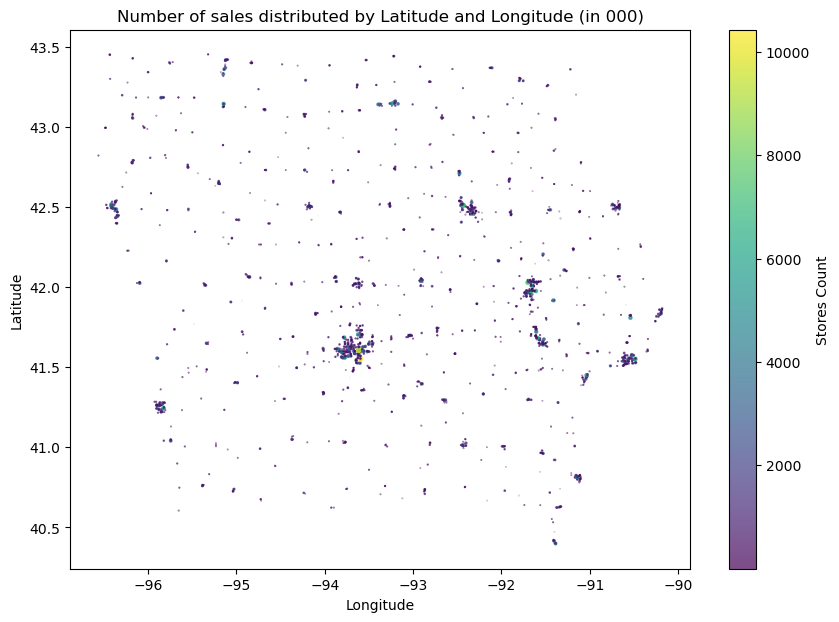

In [23]:
plt.figure(figsize=(10, 7))
# Plot the count
plt.scatter(df_iowa_store_dist['longitude'], df_iowa_store_dist['latitude'],
            s=df_iowa_store_dist['Store_Name']/1000,
            c=df_iowa_store_dist['Store_Name'],
            cmap='viridis', alpha=0.7)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Stores Count')
plt.title('Number of sales distributed by Latitude and Longitude (in 000)')
plt.show()

In [24]:
# Same viz, but plotting a map
# Create the map with Plotly Express
fig = px.scatter_geo(df_iowa_store_dist,
                     lat='latitude',
                     lon='longitude',
                     size='Store_Name',
                     projection='orthographic',
                     title='Number of sales distributed by Latitude and Longitude')

fig.update_geos(
    lataxis_range=[40, 45], # Min and max latitude for Iowa
    lonaxis_range=[-96.6, -90] # Min and max longitude for Iowa
)

# Show the map
fig.show()

In [25]:
# Group by latitude and longitude and sum the sale in Dollars
df_iowa_sales = df2.groupby(['latitude', 'longitude'])['Sale_Dollars'].sum().reset_index()

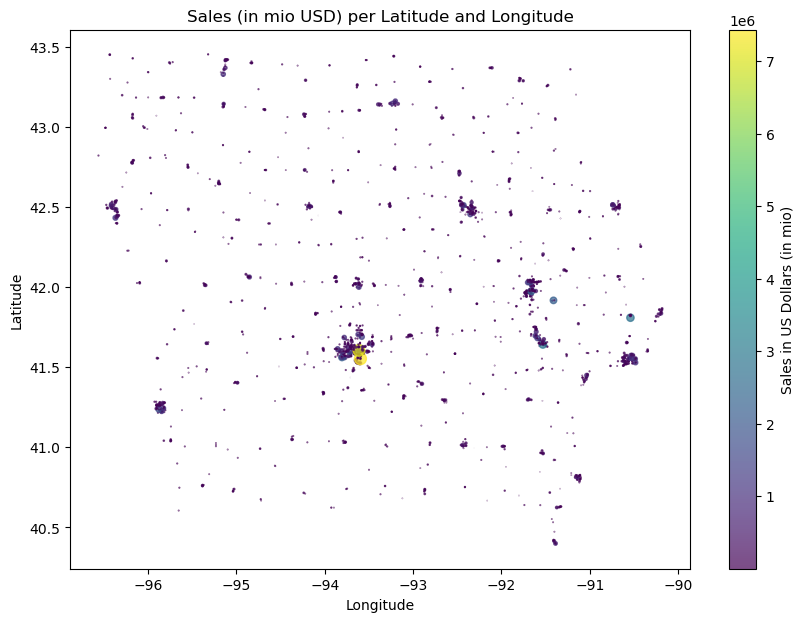

In [26]:
#Filter the latitude and longitude extremes for the state of IOWA
df_iowa_sales = df_iowa_sales[
    (df_iowa_sales['longitude'] >= -97) & (df_iowa_sales['longitude'] <= -90) &
    (df_iowa_sales['latitude'] >= 40) & (df_iowa_sales['latitude'] <= 45)
]

plt.figure(figsize=(10, 7))

# Plot the value sold by latitude and longitude
plt.scatter(df_iowa_sales['longitude'], df_iowa_sales['latitude'],
            s=df_iowa_sales['Sale_Dollars']/100000,
            c=df_iowa_sales['Sale_Dollars'],
            cmap='viridis', alpha=0.7)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Sales in US Dollars (in mio)')
plt.title('Sales (in mio USD) per Latitude and Longitude')
plt.show()

In [27]:
df_cat_sales = df2.groupby('Category_Name').agg({
    'Sale_Dollars': 'sum', 
    'Volume_Sold_L': 'sum'
}).reset_index()

total_sales_amount = df_cat_sales['Sale_Dollars'].sum()
unique_cat_count = df['Category_Name'].nunique()

print(f'There are {unique_cat_count} categories. The ammount of sales is {total_sales_amount:,.2f} USD in 2022')

There are 47 categories. The ammount of sales is 195,079,924.06 USD in 2022


In [28]:
#Top 15 categories
df2_top15_cat_sales = df_cat_sales.sort_values(by='Sale_Dollars', ascending=False).head(15)
df2_top15_cat_sales

Category_Name  Sale_Dollars  Volume_Sold_L
9                  AMERICAN VODKAS   28727338.74     2590150.03
12               CANADIAN WHISKIES   20370015.14     1297797.16
40       STRAIGHT BOURBON WHISKIES   15853197.73      589578.41
0               100% AGAVE TEQUILA   12864055.55      314001.88
45                 WHISKEY LIQUEUR   11898484.76      538630.98
39                      SPICED RUM    9451294.64      596991.27
43              TENNESSEE WHISKIES    7518005.74      236861.62
21               IMPORTED BRANDIES    5985078.84      118468.76
22    IMPORTED CORDIALS & LIQUEURS    5983512.72      181425.69
28                 IMPORTED VODKAS    5594136.28      321494.97
10                BLENDED WHISKIES    5473112.93      359387.03
6          AMERICAN FLAVORED VODKA    5455584.11      353446.78
32                   MIXTO TEQUILA    5151293.52      307929.31
42  TEMPORARY & SPECIALTY PACKAGES    4981833.38      159234.52
30                  IRISH WHISKIES    4510942.51      142128.30

In [29]:
#Get the total amount sold in the top 15 categories
top15_sales_amount = df2_top15_cat_sales['Sale_Dollars'].sum()

#Calculate the percentage
percentage_total = top15_sales_amount/total_sales_amount*100

print(f'The top 15 categories sales amount is {top15_sales_amount:,.2f} and it represents {percentage_total: .2f}% of total sales in 2022')

The top 15 categories sales amount is 149,817,886.59 and it represents  76.80% of total sales in 2022


In [30]:
#Plot in a bar graph the sales by category top15
fig = px.bar(df2_top15_cat_sales, x='Category_Name', y='Sale_Dollars', title='Top 15 categories sold 2022 - in Dollars')
fig

In [31]:
#Plot the to 15 volume in liters
df2_top15_cat_volume = df_cat_sales.sort_values(by='Volume_Sold_L', ascending=False).head(15)
fig = px.bar(df2_top15_cat_volume, x='Category_Name', y='Volume_Sold_L', title='Top 15 categories sold 2022 - in Liters')
fig

In [32]:
top15_cat_volume = df2_top15_cat_volume['Volume_Sold_L'].sum()
total_sales_volume = df_cat_sales['Volume_Sold_L'].sum()

percentage_total = top15_cat_volume/total_sales_volume*100

print(f'The top 15 categories sales volume is {top15_cat_volume:,.2f} Liters and it represents {percentage_total: .2f}% of total sales in 2022')

The top 15 categories sales volume is 8,764,237.43 Liters and it represents  79.56% of total sales in 2022


In [33]:
# Create a 'month' column based on the 'date' column
df2['month'] = df['Date'].dt.month

In [34]:
# Group by 'month' and sum up the 'Sale_Dollars'
df2_month_sales = df2.groupby('month').agg({'Sale_Dollars': 'sum'}).reset_index()

In [35]:
# Sort the monthly sales by 'month' to ensure the plot goes from January to December
df2_month_sales = df2_month_sales.sort_values(by='month')

fig_reg = px.bar(df2_month_sales, x='month', y='Sale_Dollars')
fig_reg.update_layout(
    title="Total Sales of Liquor per Month",
    xaxis_title="Month",
    yaxis_title="Total Sales in Dollars",
    xaxis=dict(tickvals=list(range(1, 13)), 
               ticktext=['January', 'February', 'March', 'April', 'May', 'June', 
                         'July', 'August', 'September', 'October', 'November', 'December'])
)

# Show the figure
fig_reg.show()

In [36]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [37]:
# Group by 'Date' and sum up the 'Sale (Dollars)'
daily_sales = df2.groupby('Date', as_index=False)['Sale_Dollars'].sum()

In [38]:
# Create the scatter plot
daily_sales_sc = go.Scatter(x=daily_sales['Date'], y=daily_sales['Sale_Dollars'], mode='lines+markers')

# Define the layout of the plot
layout = go.Layout(
    title='Daily Sales',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Sales in Dollars'),
)

# Create the figure with data and layout
fig = go.Figure(data=[daily_sales_sc], layout=layout)

iplot(fig)

In [39]:
df2_store_total_sales = df.groupby('Store_Name').agg({'Sale_Dollars': 'sum', 'Category_Name': 'nunique'}).reset_index()
df2_store_total_sales

Store_Name  Sale_Dollars  Category_Name
0     10TH HOLE INN & SUITE / GIFT SHOP       1533.98             15
1                1ST STOP BEVERAGE SHOP     344127.63             39
2                      218 FUEL EXPRESS     138660.59             36
3                       380BP / SWISHER      32435.60             29
4                  6 CORNERS GAS & GRUB       5924.12             21
...                                 ...           ...            ...
1800       YESWAY STORE # 1029/ CLARION      17227.26             12
1801       YESWAY STORE # 1036/ KANAWHA       5342.89              7
1802         YESWAY STORE #1037/ GRIMES      24210.12             16
1803     YESWAY STORE #1198 / SWEA CITY      16915.80             13
1804       YOUR PRIVATE BAR / URBANDALE       4503.56             14

[1805 rows x 3 columns]

In [40]:
df2_store_total_sales = df2_store_total_sales
df2_store_total_sales.drop(['Store_Name'], axis=1, inplace=True)
df2_store_total_sales = df2_store_total_sales.sort_values(by='Sale_Dollars', ascending=False)
df2_store_total_sales

Sale_Dollars  Category_Name
907     7436508.20             44
612     7092607.03             44
1054    2858049.11             44
21      2787108.55             44
43      2326673.77             45
...            ...            ...
926        1006.16              8
318         870.24              7
1545        526.66              5
84          249.72              1
1769        180.00              1

[1805 rows x 2 columns]

In [48]:
wcss = []
for i in range (1,11):
    kmeans_store_total_sales = KMeans(n_clusters=i, init='k-means++', n_init='auto', random_state=42)
    kmeans_store_total_sales.fit(df2_store_total_sales)
    wcss.append(kmeans_store_total_sales.inertia_)

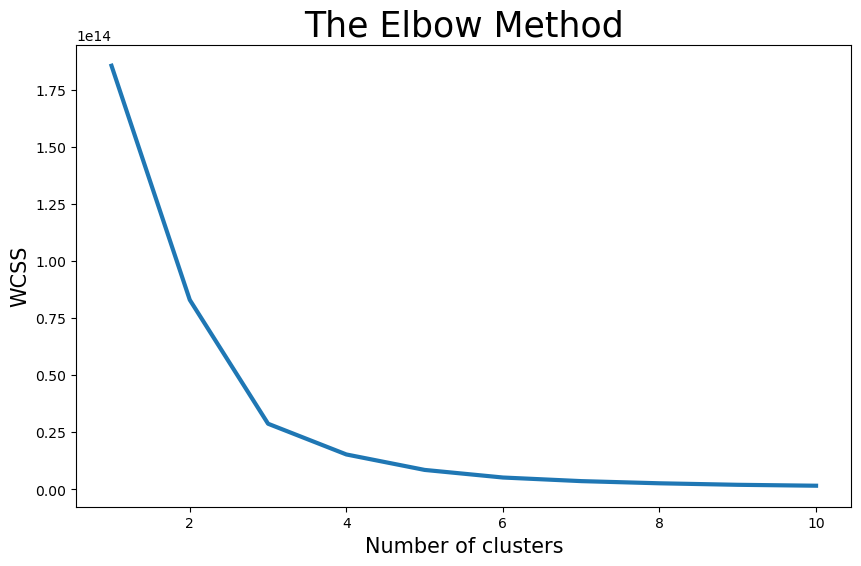

In [49]:
plt.figure(figsize = (10,6))
plt.plot(range(1, 11), wcss, lw = 3)
plt.title('The Elbow Method', fontsize = 25)
plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('WCSS', fontsize =15 )
plt.show() 

In [50]:
kmeans_store_total_sales = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_pred_store_total_sales = kmeans_store_total_sales.fit_predict(df2_store_total_sales)

In [51]:
df2_store_total_sales = np.array(df2_store_total_sales)
np.set_printoptions(suppress=True)
df2_store_total_sales

array([[7436508.2 ,      44.  ],
       [7092607.03,      44.  ],
       [2858049.11,      44.  ],
       ...,
       [    526.66,       5.  ],
       [    249.72,       1.  ],
       [    180.  ,       1.  ]])

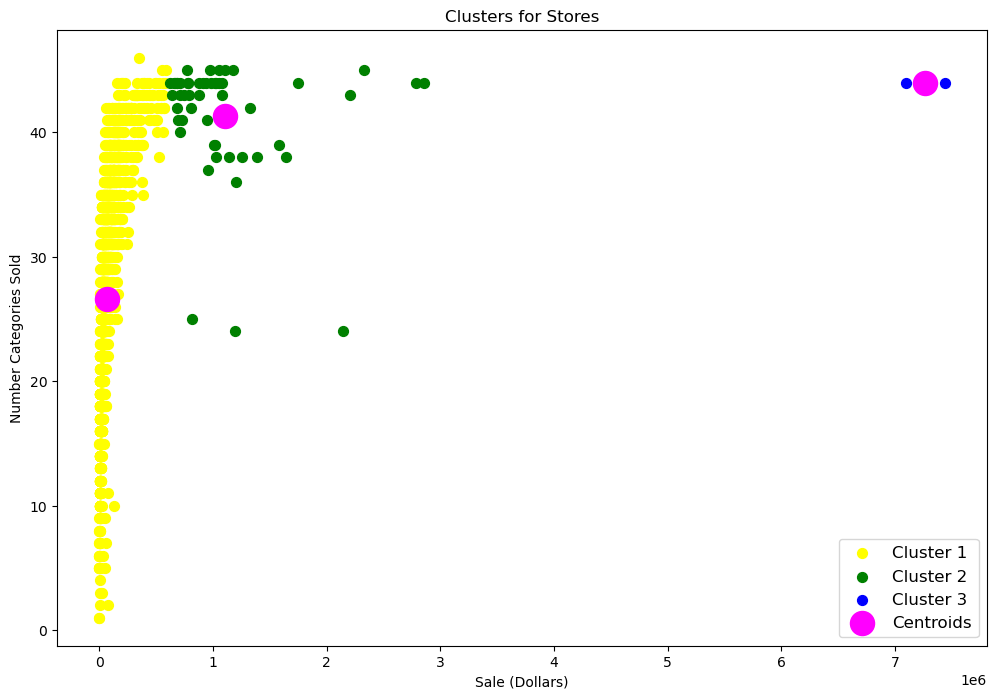

In [52]:
plt.figure(figsize=(12,8))
plt.plot(160, 45)

plt.scatter(df2_store_total_sales[y_pred_store_total_sales == 0, 0], df2_store_total_sales[y_pred_store_total_sales == 0, 1], s= 50, c='yellow', label = 'Cluster 1')
plt.scatter(df2_store_total_sales[y_pred_store_total_sales == 1, 0], df2_store_total_sales[y_pred_store_total_sales == 1, 1], s= 50, c='green', label = 'Cluster 2')
plt.scatter(df2_store_total_sales[y_pred_store_total_sales == 2, 0], df2_store_total_sales[y_pred_store_total_sales == 2, 1], s= 50, c='blue', label = 'Cluster 3')

plt.scatter(kmeans_store_total_sales.cluster_centers_[:,0], kmeans_store_total_sales.cluster_centers_[:,1], s=300, c="magenta", label="Centroids")

plt.title('Clusters for Stores')
plt.xlabel('Sale (Dollars)')
plt.ylabel('Number Categories Sold')
plt.legend(fontsize = 12)
plt.show()

In [53]:
df2.columns

Index(['Invoice_Number', 'Date', 'Store_Number', 'Store_Name', 'City',
       'Zip_Code', 'Store_Location', 'County', 'Category_Name', 'Vendor_Name',
       'Item_Description', 'Pack', 'Bottle_Vol_ml', 'State_Bottle_Cost',
       'State_Bottle_Retail', 'Bottles_Sold', 'Sale_Dollars', 'Volume_Sold_L',
       'Volume_Sold_G', 'longitude', 'latitude', 'month'],
      dtype='object')

In [54]:
df2_store_kmeans = df[['Store_Number', 'Bottles_Sold', 'Sale_Dollars', 'Volume_Sold_L', 'Volume_Sold_G']]
df2_store_kmeans = df2_store_kmeans.groupby('Store_Number').sum()
df2_store_kmeans = df2_store_kmeans.reset_index()
df2_store_kmeans

Store_Number  Bottles_Sold  Sale_Dollars  Volume_Sold_L  Volume_Sold_G
0             2106         32126     506845.36       29999.03        7917.54
1             2130         41192     711229.38       37851.90        9994.22
2             2190         65318    1174612.63       44611.71       11739.95
3             2191         39094     682203.45       38490.62       10152.79
4             2200          9302     153485.38        9726.24        2561.16
...            ...           ...           ...            ...            ...
1796          9039          3828      52068.24        2865.00         756.71
1797          9041          1242      26385.36         931.50         245.48
1798          9047          2340      54705.60        1666.80         439.98
1799          9049           468       6373.80         351.00          92.70
1800          9051            12        180.00           9.00           2.37

[1801 rows x 5 columns]

In [55]:
df2_store_kmeans = df2_store_kmeans.drop('Store_Number', axis=1)

In [56]:
pd.set_option('display.float_format', '{:.2f}'.format)
df2_store_kmeans.describe()

Bottles_Sold  Sale_Dollars  Volume_Sold_L  Volume_Sold_G
count       1801.00       1801.00        1801.00        1801.00
mean        7860.50     108317.56        6116.20        1612.00
std        18292.49     320993.52       17620.42        4651.65
min            8.00        180.00           6.00           1.52
25%         1802.00      19134.78        1009.27         265.59
50%         3356.00      35331.46        1904.56         499.39
75%         7827.00      94914.66        5296.82        1395.73
max       418192.00    7436508.20      388508.94      102590.02

### Identifying outliers

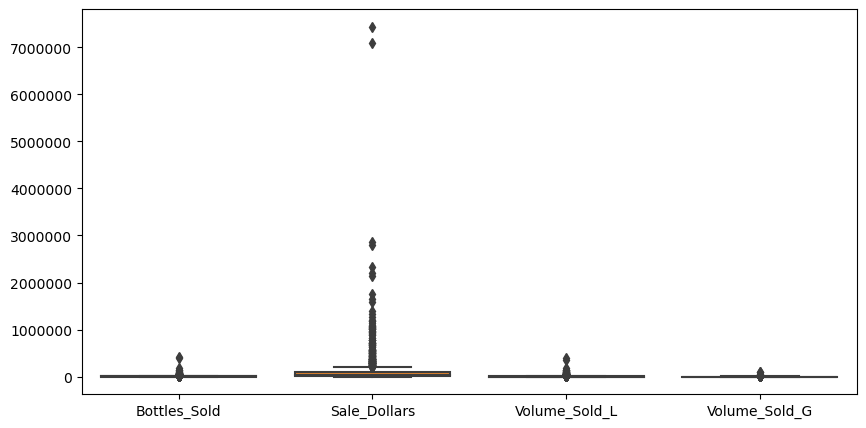

In [57]:
plt.figure(figsize = (10, 5))
outlier = pd.DataFrame(data=df2_store_kmeans)

plt.ticklabel_format(style='plain', axis='y')

sns.boxplot(data=outlier)
plt.show()

In [58]:
#df_store_kmeans = df_store_kmeans.drop('Store_Number', axis=1)

sc = StandardScaler()
df2_store_kmeans_scaled = sc.fit_transform(df2_store_kmeans)
df2_store_kmeans_scaled

array([[ 1.32689616,  1.2418895 ,  1.35578244,  1.35592661],
       [ 1.82264704,  1.87878954,  1.80157488,  1.80249037],
       [ 3.14191526,  3.32278113,  2.1853164 ,  2.17788751],
       ...,
       [-0.30187459, -0.16706521, -0.2525842 , -0.25202803],
       [-0.4042401 , -0.31767642, -0.32727965, -0.3267062 ],
       [-0.42917528, -0.33697749, -0.34669434, -0.34613052]])

In [59]:
from sklearn.cluster import KMeans

wcss = []
for i in range (1,11):
    kmeans_store_scaled = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_store_scaled.fit(df2_store_kmeans_scaled)
    wcss.append(kmeans_store_scaled.inertia_)

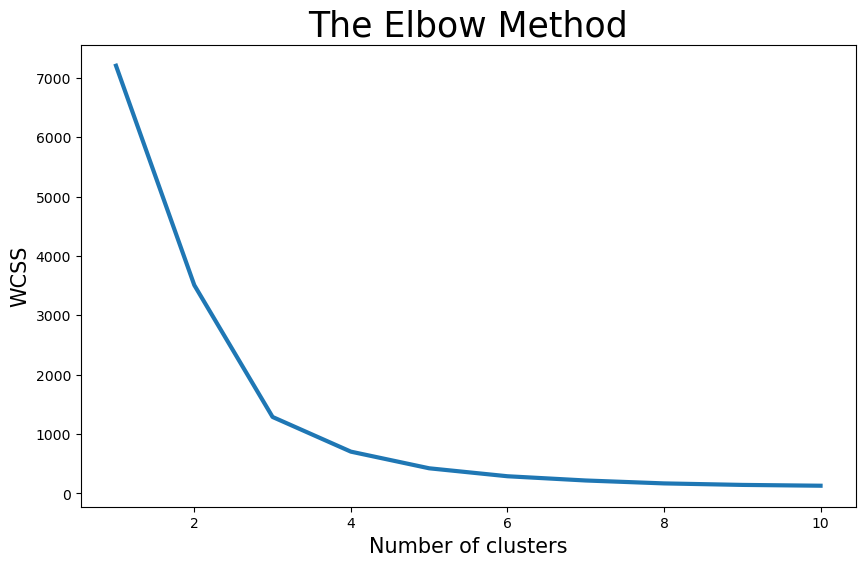

In [60]:
plt.figure(figsize = (10,6))
plt.plot(range(1, 11), wcss, lw = 3)
plt.title('The Elbow Method', fontsize = 25)
plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('WCSS', fontsize =15)
plt.show()

The silhouette score for 2 clusters is 0.98
The silhouette score for 3 clusters is 0.90
The silhouette score for 4 clusters is 0.79
The silhouette score for 5 clusters is 0.79
The silhouette score for 6 clusters is 0.55
The silhouette score for 7 clusters is 0.55
The silhouette score for 8 clusters is 0.55
The silhouette score for 9 clusters is 0.55
The silhouette score for 10 clusters is 0.55
The silhouette score for 11 clusters is 0.55
The silhouette score for 12 clusters is 0.46
The silhouette score for 13 clusters is 0.46
The silhouette score for 14 clusters is 0.46
The silhouette score for 15 clusters is 0.47
The silhouette score for 16 clusters is 0.49
The silhouette score for 17 clusters is 0.49
The silhouette score for 18 clusters is 0.39
The silhouette score for 19 clusters is 0.39
The silhouette score for 20 clusters is 0.39


<module 'matplotlib.pyplot' from 'C:\\Users\\jyoti\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

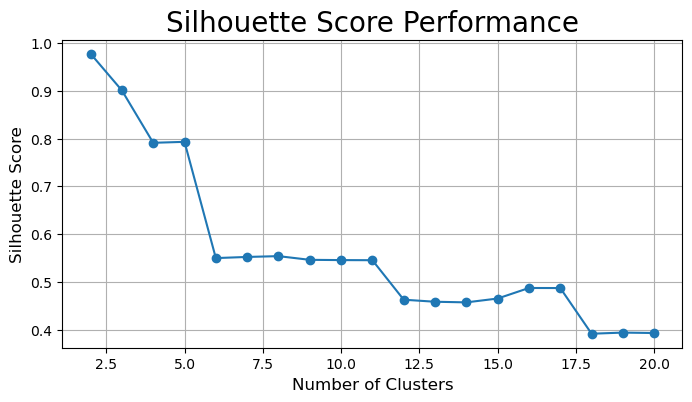

In [61]:
silhouette_scores = []
ch_scores = []
cluster_range = range(2, 21)

for n_clusters in cluster_range:
    # Apply Agglomerative Clustering
    hc = AgglomerativeClustering(n_clusters=n_clusters)
    y_pred = hc.fit_predict(df2_store_kmeans_scaled)
    
    # Calculate the silhouette score
    silhouette = silhouette_score(df2_store_kmeans_scaled, y_pred)
    silhouette_scores.append(silhouette)
    print(f"The silhouette score for {n_clusters} clusters is {silhouette:.2f}")

# Now plot the silhouette scores for each number of clusters
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score Performance', fontsize=20)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True)
plt

In [62]:
df2.columns

Index(['Invoice_Number', 'Date', 'Store_Number', 'Store_Name', 'City',
       'Zip_Code', 'Store_Location', 'County', 'Category_Name', 'Vendor_Name',
       'Item_Description', 'Pack', 'Bottle_Vol_ml', 'State_Bottle_Cost',
       'State_Bottle_Retail', 'Bottles_Sold', 'Sale_Dollars', 'Volume_Sold_L',
       'Volume_Sold_G', 'longitude', 'latitude', 'month'],
      dtype='object')

In [63]:
df2_store_kmeans_filtered = df2[['Store_Number', 'Bottles_Sold', 'Sale_Dollars', 'Volume_Sold_L', 'Volume_Sold_G']]
df2_store_kmeans_filtered = df2_store_kmeans_filtered.groupby('Store_Number').sum()
df2_store_kmeans_filtered = df2_store_kmeans_filtered.reset_index()
df2_store_kmeans_filtered = df2_store_kmeans_filtered = df2_store_kmeans_filtered[df2_store_kmeans_filtered['Sale_Dollars'] <= 180000]

df2_store_kmeans_filtered.describe()

Store_Number  Bottles_Sold  Sale_Dollars  Volume_Sold_L  Volume_Sold_G
count       1597.00       1597.00       1597.00        1597.00        1597.00
mean        5107.38       4297.98      47570.13        2680.02         705.53
std          984.38       3932.29      42691.63        2648.30         698.03
min         2200.00          8.00        180.00           6.00           1.52
25%         4521.00       1649.00      17796.34         916.50         241.46
50%         5256.00       2985.00      30824.14        1638.89         431.40
75%         5847.00       5776.00      65848.11        3571.40         939.22
max         9051.00      28266.00     179806.83       19379.00        5118.28

In [64]:
sc = StandardScaler()
df2_store_kmeans_filtered = df2_store_kmeans_filtered.drop('Store_Number', axis=1)
df2_store_kmeans_filtered_scaled = sc.fit_transform(df2_store_kmeans_filtered)
df2_store_kmeans_filtered_scaled

array([[ 1.27294537,  2.48171443,  2.66149116,  2.65921966],
       [ 1.74889856,  2.95278614,  3.03719328,  3.03453636],
       [ 0.68379113,  1.79117945,  1.74261381,  1.74379945],
       ...,
       [-0.49807874,  0.16719213, -0.38271359, -0.38054465],
       [-0.97428631, -0.96527677, -0.87971644, -0.87821545],
       [-1.09028559, -1.11040453, -1.00889639, -1.00766317]])

In [65]:
wcss = []
for i in range (1,11):
    kmeans_store_filterd_scaled = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_store_filterd_scaled.fit(df2_store_kmeans_filtered_scaled)
    wcss.append(kmeans_store_filterd_scaled.inertia_)

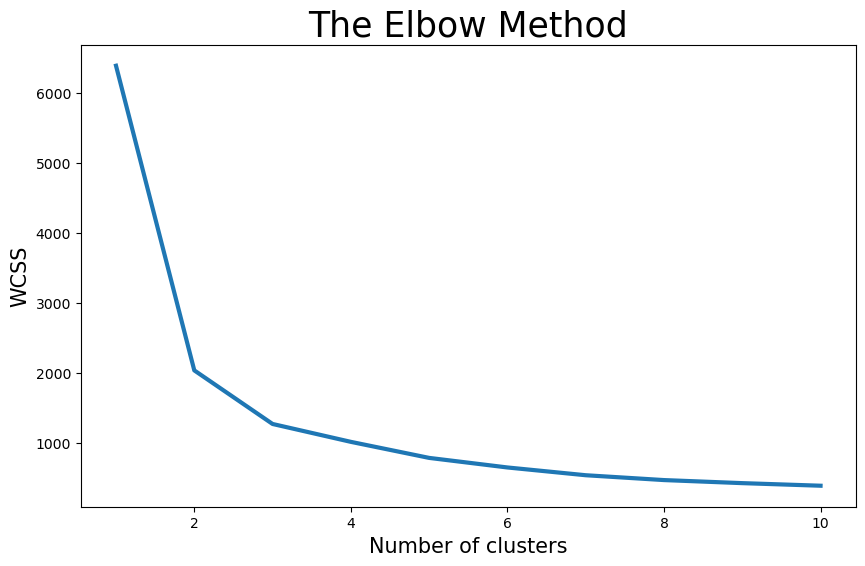

In [66]:
plt.figure(figsize = (10,6))
plt.plot(range(1, 11), wcss, lw = 3)
plt.title('The Elbow Method', fontsize = 25)
plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('WCSS', fontsize =15)
plt.show()

In [67]:
silhouette_scores_filter = []

for n_clusters in cluster_range:
    # Apply Agglomerative Clustering
    hc = AgglomerativeClustering(n_clusters=n_clusters)
    y_pred_filter = hc.fit_predict(df2_store_kmeans_filtered_scaled)
    
    # Calculate the silhouette score
    silhouette_filter = silhouette_score(df2_store_kmeans_filtered_scaled, y_pred_filter)
    silhouette_scores_filter.append(silhouette_filter)
    print(f"The silhouette score for {n_clusters} clusters is {silhouette_filter:.2f}")


The silhouette score for 2 clusters is 0.62
The silhouette score for 3 clusters is 0.58
The silhouette score for 4 clusters is 0.58
The silhouette score for 5 clusters is 0.39
The silhouette score for 6 clusters is 0.39
The silhouette score for 7 clusters is 0.38
The silhouette score for 8 clusters is 0.38
The silhouette score for 9 clusters is 0.36
The silhouette score for 10 clusters is 0.36
The silhouette score for 11 clusters is 0.36
The silhouette score for 12 clusters is 0.36
The silhouette score for 13 clusters is 0.36
The silhouette score for 14 clusters is 0.36
The silhouette score for 15 clusters is 0.36
The silhouette score for 16 clusters is 0.35
The silhouette score for 17 clusters is 0.35
The silhouette score for 18 clusters is 0.35
The silhouette score for 19 clusters is 0.31
The silhouette score for 20 clusters is 0.28


<module 'matplotlib.pyplot' from 'C:\\Users\\jyoti\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

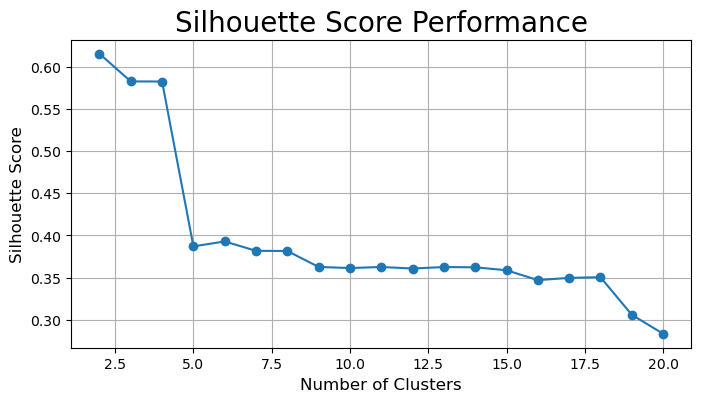

In [68]:
# Now plot the silhouette scores for each number of clusters
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, silhouette_scores_filter, marker='o', linestyle='-')
plt.title('Silhouette Score Performance', fontsize=20)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True)
plt

In [69]:
df2.columns

Index(['Invoice_Number', 'Date', 'Store_Number', 'Store_Name', 'City',
       'Zip_Code', 'Store_Location', 'County', 'Category_Name', 'Vendor_Name',
       'Item_Description', 'Pack', 'Bottle_Vol_ml', 'State_Bottle_Cost',
       'State_Bottle_Retail', 'Bottles_Sold', 'Sale_Dollars', 'Volume_Sold_L',
       'Volume_Sold_G', 'longitude', 'latitude', 'month'],
      dtype='object')

In [70]:
df2_zip_sales = df2[['Zip_Code', 'Bottles_Sold', 'Sale_Dollars', 'Volume_Sold_L', 'Volume_Sold_G']]
df2_zip_sales = df2_zip_sales.groupby('Zip_Code').sum()
df2_zip_sales = df2_zip_sales.reset_index()
df2_zip_sales

Zip_Code  Bottles_Sold  Sale_Dollars  Volume_Sold_L  Volume_Sold_G
0    50003.00         32048     426509.42       22630.69        5957.07
1    50005.00          1679      18473.83         916.77         241.50
2    50006.00          3274      53020.83        3139.82         827.28
3    50008.00           558      26367.94         439.25         115.11
4    50009.00        130583    1831781.30      100530.46       26491.99
..        ...           ...           ...            ...            ...
467  52803.00         94540     769603.26       35438.58        9328.38
468  52804.00        133411    1338302.12       71020.36       18699.75
469  52806.00        108909    1308749.98       73780.02       19443.50
470  52807.00        265318    4517146.18      270406.67       71341.86
471  57222.00          2216      17705.46         947.95         249.53

[472 rows x 5 columns]

In [71]:
num_stores_zip = df2[['Zip_Code','Store_Name']]
num_stores_zip = df2.groupby('Zip_Code')['Store_Name'].nunique().to_frame().sort_values('Store_Name')
num_stores_zip = num_stores_zip.reset_index()
num_stores_zip.rename(columns={
    'Store_Name':'Store_Count'
}, inplace=True)
num_stores_zip.head()

Zip_Code  Store_Count
0  57222.00            1
1  50622.00            1
2  52322.00            1
3  50628.00            1
4  50629.00            1

In [72]:
df2_zip_sales = pd.merge(df2_zip_sales,num_stores_zip, how='inner', on="Zip_Code")
df2_zip_sales.head()

Zip_Code  Bottles_Sold  Sale_Dollars  Volume_Sold_L  Volume_Sold_G  \
0  50003.00         32048     426509.42       22630.69        5957.07   
1  50005.00          1679      18473.83         916.77         241.50   
2  50006.00          3274      53020.83        3139.82         827.28   
3  50008.00           558      26367.94         439.25         115.11   
4  50009.00        130583    1831781.30      100530.46       26491.99   

   Store_Count  
0            5  
1            1  
2            2  
3            1  
4           13

In [73]:
df2_zip_sales.shape

(472, 6)

In [74]:
df2_zip_sales['Sales_by_zip'] = df2_zip_sales['Sale_Dollars']/df2_zip_sales['Store_Count']
df2_zip_sales.head()

Zip_Code  Bottles_Sold  Sale_Dollars  Volume_Sold_L  Volume_Sold_G  \
0  50003.00         32048     426509.42       22630.69        5957.07   
1  50005.00          1679      18473.83         916.77         241.50   
2  50006.00          3274      53020.83        3139.82         827.28   
3  50008.00           558      26367.94         439.25         115.11   
4  50009.00        130583    1831781.30      100530.46       26491.99   

   Store_Count  Sales_by_zip  
0            5      85301.88  
1            1      18473.83  
2            2      26510.42  
3            1      26367.94  
4           13     140906.25

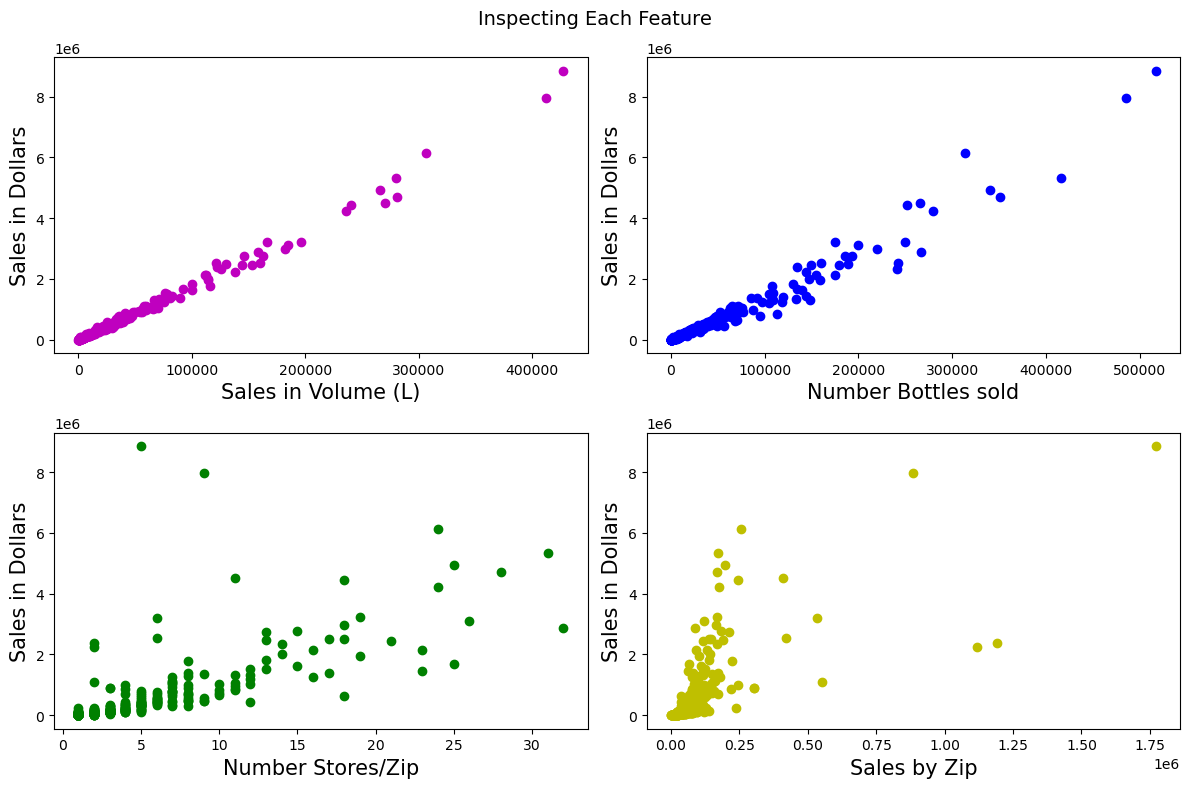

In [75]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(12,8))
plt.suptitle('Inspecting Each Feature', fontsize = 14)

axes[0,0].plot(df2_zip_sales['Volume_Sold_L'],df2_zip_sales['Sale_Dollars'],'mo')
axes[0,0].set_ylabel("Sales in Dollars", fontsize = 15)
axes[0,0].set_xlabel("Sales in Volume (L)", fontsize = 15)

axes[0,1].plot(df2_zip_sales['Bottles_Sold'],df2_zip_sales['Sale_Dollars'],'bo')
axes[0,1].set_ylabel("Sales in Dollars", fontsize = 15)
axes[0,1].set_xlabel("Number Bottles sold", fontsize = 15)

axes[1,0].plot(df2_zip_sales['Store_Count'],df2_zip_sales['Sale_Dollars'],'go')
axes[1,0].set_ylabel("Sales in Dollars", fontsize = 15)
axes[1,0].set_xlabel("Number Stores/Zip", fontsize = 15)

axes[1,1].plot(df2_zip_sales['Sales_by_zip'],df2_zip_sales['Sale_Dollars'],'yo')
axes[1,1].set_ylabel("Sales in Dollars", fontsize = 15)
axes[1,1].set_xlabel('Sales by Zip', fontsize = 15)
plt.tight_layout();

In [76]:
print(cat_cols)
print(num_cols)

Index(['Invoice_Number', 'Store_Name', 'City', 'Store_Location', 'County',
       'Category_Name', 'Vendor_Name', 'Item_Description'],
      dtype='object')
Index(['Date', 'Store_Number', 'Zip_Code', 'Pack', 'Bottle_Vol_ml',
       'State_Bottle_Cost', 'State_Bottle_Retail', 'Bottles_Sold',
       'Sale_Dollars', 'Volume_Sold_L', 'Volume_Sold_G', 'longitude',
       'latitude'],
      dtype='object')


### Chcking the correlation

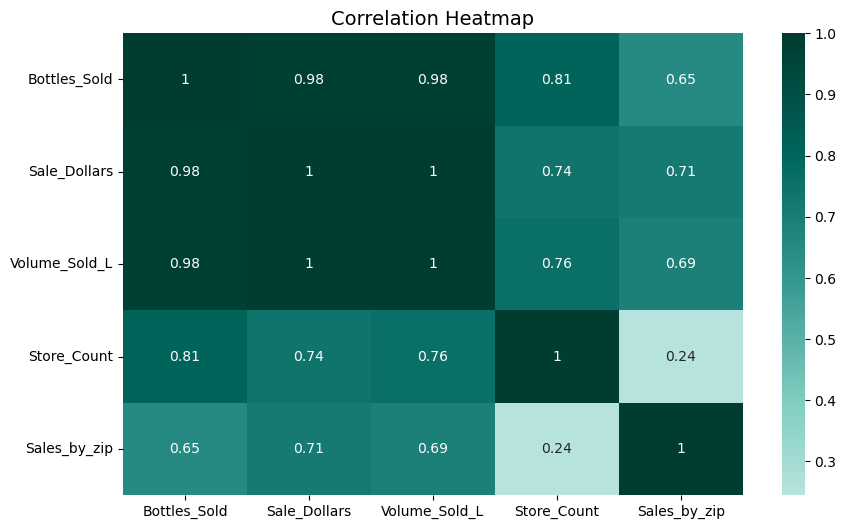

In [77]:
df_correlation = df2_zip_sales[['Bottles_Sold','Sale_Dollars', 'Volume_Sold_L', 'Store_Count', 'Sales_by_zip']]
plt.figure(figsize = (10,6))
heatmap = sns.heatmap(df_correlation.corr(), annot=True, cmap='BrBG', center=0)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14})
plt.show()

In [78]:
# Splitting data into trainig and test data, using k-folds cv to test data
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

#### Encoding of the Categorical Features

In [79]:
for i in cat_cols:
    print(f'{i}',df2[i].nunique())

Invoice_Number 1184628
Store_Name 1805
City 439
Store_Location 1971
County 99
Category_Name 47
Vendor_Name 209
Item_Description 3301


In [80]:
df2.drop(['Invoice_Number'],axis=1,inplace=True)

In [81]:
from sklearn.preprocessing import LabelEncoder
ld = LabelEncoder()

### Checking the Data Normality

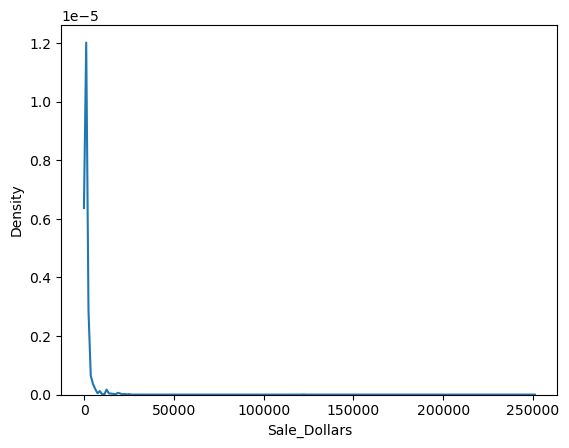

In [82]:
sns.kdeplot(df2['Sale_Dollars'])
plt.show()

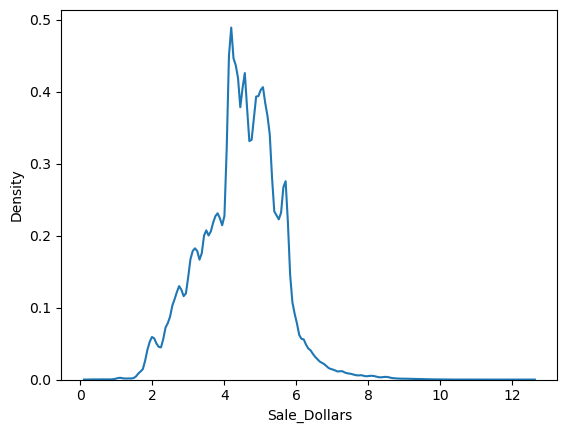

In [83]:
sns.kdeplot(np.log(df2['Sale_Dollars']))
plt.show()

### Splitting the Data into x and y

In [84]:
x = df2_zip_sales.drop(['Zip_Code', 'Sale_Dollars'], axis=1)
y = df2_zip_sales['Sale_Dollars']
print(x.shape)
print(y.shape)

(472, 5)
(472,)


In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(330, 5)
(142, 5)
(330,)
(142,)


### OLS Model

In [87]:
import statsmodels.api as sm

In [88]:
x1 = x.copy()
y1 = y.copy()

In [89]:
print(x1.shape)
print(y1.shape)

(472, 5)
(472,)


In [90]:
x1 = sm.add_constant(x1)
ols_m1 = sm.OLS(y1,x1).fit()
ols_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sale_Dollars   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.613e+04
Date:                Sun, 19 May 2024   Prob (F-statistic):               0.00
Time:                        15:02:31   Log-Likelihood:                -5952.2
No. Observations:                 472   AIC:                         1.192e+04
Df Residuals:                     466   BIC:                         1.194e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2687.5898   5523.306      0.487      0.627   -8166.080    1.35e+04
Bottles_Sold      3.9816      0.328     12.128      0.000       3.336       4.627
Volume_Sold_L  -275.1006    150.212     -1.831      0.068    -570.278      20.077
Volume_Sold_G  1097.0655    568.641      1.929      0.054     -20.352    2214.483
Store_Count   -1.137e+04   2218.663     -5.125      0.000   -1.57e+04   -7010.872
Sales_by_zip      0.1059      0.046      2.302      0.022       0.015       0.196
==============================================================================
Omnibus:                      263.292   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31417.186
Skew:                           1.395   Prob(JB):                         0.00
Kurtosis:                      42.871   Cond. No.                     2.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
print('OLS_M1')
print('ols_m1.rsquared -',ols_m1.rsquared)
print('ols_m1.rsquared_adj -',ols_m1.rsquared_adj)

OLS_M1
ols_m1.rsquared - 0.994254523258987
ols_m1.rsquared_adj - 0.9941928765128388


In [92]:
sig_feat = ols_m1.pvalues[ols_m1.pvalues<=0.7]
sig_feat 

const           0.63
Bottles_Sold    0.00
Volume_Sold_L   0.07
Volume_Sold_G   0.05
Store_Count     0.00
Sales_by_zip    0.02
dtype: float64

In [93]:
sig_feat.index

Index(['const', 'Bottles_Sold', 'Volume_Sold_L', 'Volume_Sold_G',
       'Store_Count', 'Sales_by_zip'],
      dtype='object')

In [94]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [95]:
from sklearn.metrics import *

In [96]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(np.exp(ytest),np.exp(ypred))
    mse = mean_squared_error(np.exp(ytest),np.exp(ypred))
    rmse = mean_squared_error(np.exp(ytest),np.exp(ypred),squared=False)
    return {'MAE':mae,'MSE':mse,'RMSE':rmse}

def model_res(model,x_train,x_test,y_train,y_test,ypred,mname):
    train_r2 = model.score(x_train,y_train)
    test_r2 = model.score(x_test,y_test)
    w = eval_model(y_test,ypred)
    res_metrics = {'Train_R2':train_r2,'Test_R2':test_r2,'Test_MSE':w['MSE'],
                    'Test_RMSE':w['RMSE'],'Test_MAE':w['MAE']}
    res = pd.DataFrame(res_metrics, index=[mname]) 
    return res

In [97]:
def eval_model_advanced(model,x_train,y_train,x_test,y_test,modelname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_r2 = model.score(x_train,y_train)
    test_r2 = model.score(x_test,y_test)
    test_mae = mean_absolute_error(y_test,ypred)
    test_mse = mean_squared_error(y_test,ypred)
    test_rmse = np.sqrt(test_mse)
    res = pd.DataFrame({'Train_R2':train_r2,'Test_R2':test_r2,'Test_MAE':test_mae,
                        'Test_MSE':test_mse,'Test_RMSE':test_rmse},index=[modelname])
    return res

### Decision Tree

In [98]:
dt1 = DecisionTreeRegressor(max_depth=10,min_samples_leaf=5, min_samples_split=20)
dt1.fit(x_train,y_train)
ypred_dt1 =dt1.predict(x_test)

In [99]:
dt1_df = eval_model_advanced(dt1,x_train,y_train,x_test,y_test,'Dtree1')
dt1_df

Train_R2  Test_R2  Test_MAE        Test_MSE  Test_RMSE
Dtree1      0.93     0.53 150750.61 335673855564.76  579373.68

### Random Forest

In [100]:
rf1 = RandomForestRegressor(n_estimators=120,min_samples_split=12,max_depth=18)
rf1.fit(x_train,y_train)
ypred_rf1  = rf1.predict(x_test)

In [101]:
rf1_df = eval_model_advanced(rf1,x_train,y_train,x_test,y_test,'RForest1')
rf1_df

Train_R2  Test_R2  Test_MAE       Test_MSE  Test_RMSE
RForest1      0.95     0.94  63524.60 41833717237.89  204532.92

### KNN Regressor

In [102]:
knn1 = KNeighborsRegressor(n_neighbors=20)
knn1.fit(x_train,y_train)
ypred_knn1  = knn1.predict(x_test)

In [103]:
knn1_res = eval_model_advanced(knn1,x_train,y_train,x_test,y_test,'KNN1')
knn1_res

Train_R2  Test_R2  Test_MAE       Test_MSE  Test_RMSE
KNN1      0.74     0.88  93961.21 86917393484.71  294817.56

### AdaBoost Regression

In [104]:
ada1 = AdaBoostRegressor(n_estimators=70)
ada1.fit(x_train,y_train)
ypred_ada1 = ada1.predict(x_test)

In [105]:
ada1_df = eval_model_advanced(ada1,x_train,y_train,x_test,y_test,'AdaBoost_Reg')
ada1_df

Train_R2  Test_R2  Test_MAE       Test_MSE  Test_RMSE
AdaBoost_Reg      0.99     0.94 127265.21 40378646203.46  200944.39

### XGBoost

In [106]:
xgb1 = XGBRegressor(n_estimators=70,max_depth=15)
xgb1.fit(x_train,y_train)
ypred_xgb1 = xgb1.predict(x_test)

In [107]:
xgb1_res = eval_model_advanced(xgb1,x_train,y_train,x_test,y_test,'XGBoost_Reg')
xgb1_res

Train_R2  Test_R2  Test_MAE       Test_MSE  Test_RMSE
XGBoost_Reg      1.00     0.97  40708.61 18059061457.99  134384.01

In [108]:
all_res = pd.concat([knn1_res,dt1_df,rf1_df,ada1_df,xgb1_res])
all_res

Train_R2  Test_R2  Test_MAE        Test_MSE  Test_RMSE
KNN1              0.74     0.88  93961.21  86917393484.71  294817.56
Dtree1            0.93     0.53 150750.61 335673855564.76  579373.68
RForest1          0.95     0.94  63524.60  41833717237.89  204532.92
AdaBoost_Reg      0.99     0.94 127265.21  40378646203.46  200944.39
XGBoost_Reg       1.00     0.97  40708.61  18059061457.99  134384.01

In [109]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [110]:
hparams_rf = {'n_estimators':[10,15,35,60,70,80,90,100,120,150],
              'max_depth':[6,7,8,9,10,12,15,16,17,18,19,20],
              'min_samples_split':[4,5,8,10,12,15,20,22,24,26]}

print(10*12*10)

1200


In [111]:
rf_base1 = RandomForestRegressor()
rs1 = RandomizedSearchCV(rf_base1,param_distributions=hparams_rf,cv=5,
                        scoring='neg_mean_squared_error')
rs1.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [6, 7, 8, 9, 10, 12, 15,
                                                      16, 17, 18, 19, 20],
                                        'min_samples_split': [4, 5, 8, 10, 12,
                                                              15, 20, 22, 24,
                                                              26],
                                        'n_estimators': [10, 15, 35, 60, 70, 80,
                                                         90, 100, 120, 150]},
                   scoring='neg_mean_squared_error')

In [112]:
print(rs1.best_score_)
print(rs1.best_params_)

-39880127354.10075
{'n_estimators': 35, 'min_samples_split': 4, 'max_depth': 7}


In [113]:
from sklearn.model_selection import GridSearchCV

In [114]:
dt_base = DecisionTreeRegressor()
hparams_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

In [115]:
gs1 = GridSearchCV(estimator=dt_base, param_grid=hparams_dt,
                   scoring='neg_mean_squared_error',  # Or use 'r2'
                   cv=5)

In [116]:
gs1.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='neg_mean_squared_error')

In [117]:
print("Best parameters found: ", gs1.best_params_)

Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [118]:
print(x_train.shape)

(330, 5)


### Final Model

In [119]:
xgb_final=XGBRegressor(objective='reg:squarederror',eval_metric='rmse',reg_lambda=0.2,eta=0.2,max_depth=3,n_estimators=80)
xgb_final.fit(x,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.2, eval_metric='rmse',
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=80,
             n_jobs=None, num_parallel_tree=None, ...)

In [120]:
print(df2_zip_sales.shape)
print(x.shape)

(472, 7)
(472, 5)


In [121]:
test_data=df2_zip_sales[x.columns]
print(test_data.columns)
print(x.columns)

Index(['Bottles_Sold', 'Volume_Sold_L', 'Volume_Sold_G', 'Store_Count',
       'Sales_by_zip'],
      dtype='object')
Index(['Bottles_Sold', 'Volume_Sold_L', 'Volume_Sold_G', 'Store_Count',
       'Sales_by_zip'],
      dtype='object')


In [122]:
test_data.dtypes

Bottles_Sold       int64
Volume_Sold_L    float64
Volume_Sold_G    float64
Store_Count        int64
Sales_by_zip     float64
dtype: object

In [123]:
ypred_test=xgb_final.predict(test_data)
ypred_test[:10]

array([ 390511.72 ,   16295.995,   47650.19 ,   19922.29 , 1804494.   ,
       3098961.5  ,  500259.44 ,   34520.117, 2501034.2  ,  713910.4  ],
      dtype=float32)

In [124]:
xgb_final = eval_model_advanced(xgb1,x_train,y_train,x_test,y_test,'XGBoost_Reg')
xgb_final

Train_R2  Test_R2  Test_MAE       Test_MSE  Test_RMSE
XGBoost_Reg      1.00     0.97  40708.61 18059061457.99  134384.01

In [140]:
import pickle

In [141]:
# Serialization
pickle.dump(xgb_final,open('IOWA_LIQUOR_SALES_PREDICTION.pkl','wb'))

In [143]:
# deserialization
model = pickle.load(open('IOWA_LIQUOR_SALES_PREDICTION.pkl','rb'))